28 August 2020

## Predicting Car Prices

We will use the machine learning model of **k-Nearest Neighbors (k-NN)** to predict a car's market **price** using its attributes. The data set we will be working with contains information on various cars. You can read more about the data set and can download it directly from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/automobile).

The data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars. The attribute information is shown below:
1. `symboling`: -3, -2, -1, 0, 1, 2, 3. A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.
2. `normalized-losses`: continuous from 65 to 256. The average loss per car per year.
3. `make`: alfa-romero, audi, bmw, chevrolet, dodge, honda, isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota, volkswagen, volvo
4. `fuel-type`: diesel, gas.
5. `aspiration`: std (standard), turbo (with turbocharger).
6. `num-of-doors`: four, two.
7. `body-style`: hardtop, wagon, sedan, hatchback, convertible.
8. `drive-wheels`: 4wd, fwd, rwd.
9. `engine-location`: front, rear.
10. `wheel-base`: continuous from 86.6 to 120.9.
11. `length`: continuous from 141.1 to 208.1.
12. `width`: continuous from 60.3 to 72.3.
13. `height`: continuous from 47.8 to 59.8.
14. `curb-weight`: continuous from 1488 to 4066.
15. `engine-type`: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. `num-of-cylinders`: eight, five, four, six, three, twelve, two.
17. `engine-size`: continuous from 61 to 326.
18. `fuel-system`: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. `bore`: continuous from 2.54 to 3.94.
20. `stroke`: continuous from 2.07 to 4.17.
21. `compression-ratio`: continuous from 7 to 23.
22. `horsepower`: continuous from 48 to 288.
23. `peak-rpm`: continuous from 4150 to 6600.
24. `city-mpg`: continuous from 13 to 49.
25. `highway-mpg`: continuous from 16 to 54.
26. `price`: continuous from 5118 to 45400.



In [1]:
# Import Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold, cross_val_score

In [2]:
# Define the column names of dataset:
col_names = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width',
'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system',
'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg',
'price']

# Read the .data file into dataframe:
cars = pd.read_csv('imports-85.data', header=None, names=col_names)

# Display the first five rows of dataframe:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Data Cleaning

In [3]:
# Display a concise summary of the 'cars' dataframe:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

While some columns seem to contain numeric elements, their type are object. The reason this happens is because they contain question marks `?` indicating the missing values. Also, because `?` is a string value, columns containing this value were cast to the pandas object data type (instead of a numeric type like `int` or `float`). For instance, we can see the first three rows of `normalized-losses` column. The columns that contain `?` signs as missing values are the following:
- `normalized-losses`,
- `bore`,
- `stroke`,
- `horsepower`,
- `peak-rpm`, and
- `price`.

Let's replace the `?` signs with NaN (missing value) and convert the elements of these columns to numeric type (`float`).

In [4]:
# Replace the '?' sign with NaN (missing value):
cars = cars.replace('?', np.nan)

# Convert the columns containing the cleaned values to the 'float':
col_to_float = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']
for c in col_to_float:
    cars[c] = cars[c].astype(float)

There are two columns, such as `num-of-doors` and `num-of-cylinders`, that can be converted to numeric as well.

In [5]:
# The unique values of 'num-of-doors' column:
cars['num-of-doors'].unique()

array(['two', 'four', nan], dtype=object)

In [6]:
# The unique values of 'num-of-cylinders' column:
cars['num-of-cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [7]:
# Create dictionaries for replacing the elements of columns, from strings to numeric:
mapping_doors = {'two': 2, 'four': 4}
mapping_cylinder = {'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12}

# Replace the 'string' elements using the above dictionaries:
cars = cars.replace({'num-of-doors': mapping_doors, 'num-of-cylinders': mapping_cylinder})

In [8]:
# Display a concise summary of the dataframe after removing the '?' signs:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    float64
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    int64  
 16  engine-size        205 non

The aforementioned columns have been converted correctly from 'object' type to numeric (`float`, `int`).

In [9]:
# Display the first five rows of dataframe:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,4.0,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,4.0,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


We will use the **Euclidean distance** as the main **similarity metric** which works by comparing a fixed set of numerical features.

When selecting features (attributes) to use in the model, we need to watch out for columns that don't work well with the distance equation. This includes columns containing:
- non-numerical values (e.g. fuel-type)
  - Euclidean distance equation expects numerical values
- missing values
  - distance equation expects a value for each observation and attribute
- non-ordinal values
  - ranking by Euclidean distance doesn't make sense if all attributes aren't ordinal

Let's look at row's values to identify any columns containing non-numerical or non-ordinal values. Next, we will drop those columns and then look for missing values in each of the remaining columns.

In essence, for calculating the **Euclidean distance equation**, we should <u>drop columns</u> that contain:
- **non-numerical** values, 
- **non-ordinal** values, and
- **missing values**.


### Removing Features (Columns)

The following columns contain **non-numerical** values and we are going to remove them:
- `make`: e.g. 'alfa-romero', 'audi', 'bmw' etc.
- `fuel-type`: e.g. 'gas', 'diesel'
- `aspiration`: e.g. 'std', 'turbo'
- `body-style`: e.g. 'convertible', 'hatchback', 'sedan' etc.
- `drive-wheels`: e.g. 'rwd', 'fwd', '4wd'
- `engine-location`: e.g. 'front', 'rear'
- `engine-type`: e.g. 'dohc', 'ohcv', 'ohc' etc.
- `fuel-system`: e.g. 'mpfi', '2bbl', 'mfi' etc.

In [10]:
# Define the columns that are not numeric:
drop_cols = ['make', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels',
             'engine-location', 'engine-type', 'fuel-system']

# Drop the columns which are not numeric:
cars = cars.drop(columns=drop_cols)

# Display the first five rows of the dataset:
cars.head()

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,2.0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,2.0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,2.0,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,4.0,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,4.0,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


Now the `cars` dataframe contains only numeric columns.

### Handling Missing Values

In [11]:
def count_missing_values(df):
    """
    Count the rows containing missing values by column in a dataframe.
    'df': the selected DataFrame.
    """
    
    # Count the missing values for each column:
    count_missing_values = df.isnull().sum()
    
    df_missing_values = pd.DataFrame({'Missing values': count_missing_values,
                                      '%': round(count_missing_values/len(df), 4)*100})
    
    # Visualise the Missing values
    # the light color corresponds to the missing values.
    print('Visualise the missing values (light color):')
    sns.heatmap(df.isnull(), cbar=False)
    plt.show()
    
    return df_missing_values

Visualise the missing values (light color):


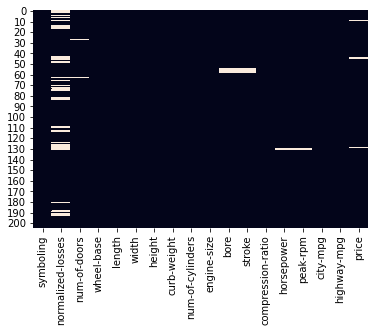

,Missing values,%
symboling,0,0.00
normalized-losses,41,20.00
num-of-doors,2,0.98
wheel-base,0,0.00
length,0,0.00
width,0,0.00
height,0,0.00
curb-weight,0,0.00
num-of-cylinders,0,0.00
engine-size,0,0.00


In [12]:
# Count the rows that contain missing values by column:
count_missing_values(cars)

Of the remaining columns, 6 columns have a few missing values, that is, less than **2%** of the total number of rows:
- `num-of-doors`,
- `bore`,
- `stroke`,
- `horsepower`,
- `peak-rpm`, and
- `price`

Since the number of rows containing missing values for the above columns is low, we can select and remove these rows without losing much information.

There is only one column that has a large number of missing values:

- `normalized-losses` - 20% of the rows contain missing values,

and we cannot handle them easily. We cannot just remove the rows containing missing values for this column because we would miss out on the majority of the observations in the dataset. Instead, we can remove it entirely from consideration.

Visualise the missing values (light color):


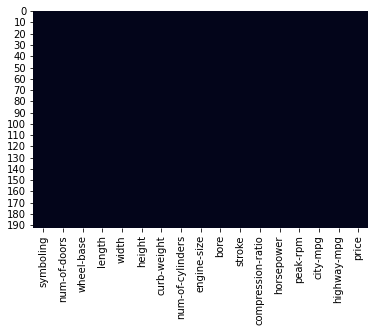

,Missing values,%
symboling,0,0.0
num-of-doors,0,0.0
wheel-base,0,0.0
length,0,0.0
width,0,0.0
height,0,0.0
curb-weight,0,0.0
num-of-cylinders,0,0.0
engine-size,0,0.0
bore,0,0.0


In [13]:
# Remove the 'normalized-losses' column:
cars = cars.drop(columns=['normalized-losses'])

# Remove all rows that contain a missing value:
cars = cars.dropna()

# Reset the index:
# parameter: 'drop=True' to avoid the old index being added as a column.
cars = cars.reset_index(drop=True)

# Quick check that all the missing values have been removed correctly:
count_missing_values(cars)

See the above graph and dataframe of missing values, we can understand that we have removed all the missing values correctly. In the next cell code, we can see the `cars` dataframe after all the changes we made:

In [14]:
# Hear is how the 'cars' DataFrame looks after all the changes we made:
cars.head()

,symboling,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,2.0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,2.0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,2.0,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,4.0,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,4.0,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


#### Plotting the Features of `cars` DataFrame

In [15]:
def plot_features(df):
    """
    Plot the features of the DataFrame.
    """
    
    # Dimensionality of subplot:
    nrows = 5 # number of rows
    ncols = 4 # number of columns

    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 10))

    count = 0
    for row in range(nrows):
        for col in range(ncols):

            if count <= (len(df.columns) - 1):

                #Plot each graph:
                ax[row, col].plot(df.iloc[:, count].values, linewidth=1, color='black')
                ax[row, col].set_xlabel('Observations')
                ax[row, col].set_ylabel(df.columns[count])

                # Draw grid lines:
                ax[row, col].grid(True)

            else:
                # Turn empty subplots invisible:
                ax[row, col].set_visible(False)

            count += 1

    fig.tight_layout()
    plt.show()

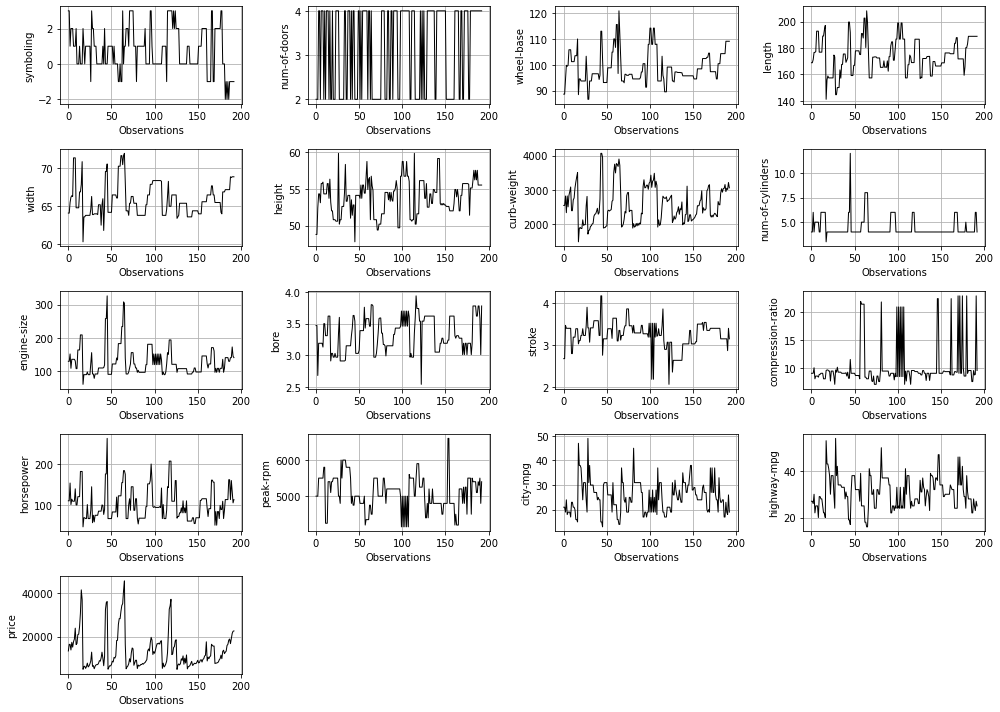

In [16]:
# Create line charts for each column of 'cars' dataframe:
plot_features(cars)

Judging from the plots we just created, it does not appear that there are **extreme values** as **outliers**.

### Feature Scaling

Distance-based algorithms like **k-Nearest Neighbors** (K-Means and SVM as well) are most affected by the range of features. This is because behind the scenes they are using distances, like **Euclidean distances**, between data points to determine their similarity.

In [17]:
def range_calc(df):
    """
    Subtract the smallest value (min) from largest value (max) for each
    column of DataFrame in order to calculate their Range (max-min).
    """
    
    # Create an empty list to store the ranges of features
    list_range = []
    for col in df.columns:
        range_ = df[col].max() - df[col].min()
        list_range.append(int(range_))
    
    # Display the ranges of features as a DataFrame:
    df_ = pd.DataFrame(list_range, index=df.columns, columns=['Range (max-min)'])
    
    return df_

In [18]:
# Calculate the Range (max-min) for each column of 'cars' DataFrame:
range_calc(cars)

,Range (max-min)
symboling,5
num-of-doors,2
wheel-base,34
length,67
width,11
height,12
curb-weight,2578
num-of-cylinders,9
engine-size,265
bore,1


We have noticed that while the majority of columns hover between `1` and `67`, the values in the `curb-weight`, `engine-size`, `horsepower` and `peak-rpm` columns span much larger ranges (from `214` to `2578`). If we use the last 4 columns as part of a k-Nearest Neighbors model, they could end up having outsized effect on the **Euclidean distance** calculations, because of the largeness of the values.

To prevent any single column from having too much of an impact on the distance, we can standardise all of the columns (apart from the target column, `price`) to have a mean of `0` and a standard deviation `1`.

To standardise the values in a column to the standard normal distribution, we need to:
- from each value, subtract the mean of the column, and
- divide each value by the standard deviation of the column.

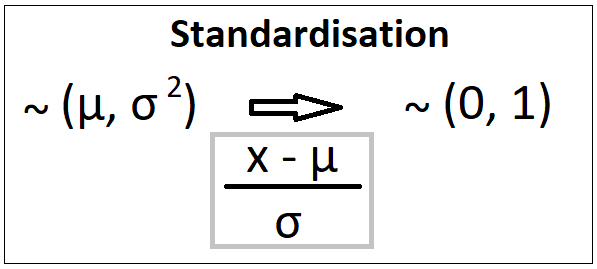

In [19]:
# Normalise all the feature columns in 'cars' dataframe
standardised_cars = (cars - cars.mean()) / cars.std()

# Replace the 'price' column with the initial values from the 'cars' dataframe:
standardised_cars['price'] = cars['price']

# Display the first five rows of 'standardised_cars' dataframe:
standardised_cars.head()

,symboling,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1.782215,-1.172839,-1.678015,-0.442872,-0.839080,-2.117092,-0.025646,-0.410180,0.045098,0.511697,-1.803495,-0.287525,0.198054,-0.212806,-0.677292,-0.555613,13495.0
1,1.782215,-1.172839,-1.678015,-0.442872,-0.839080,-2.117092,-0.025646,-0.410180,0.045098,0.511697,-1.803495,-0.287525,0.198054,-0.212806,-0.677292,-0.555613,16500.0
2,0.163544,-1.172839,-0.719041,-0.250543,-0.184200,-0.613816,0.496473,1.544506,0.574066,-2.388614,0.701095,-0.287525,1.330822,-0.212806,-0.990387,-0.702307,16500.0
3,0.972880,0.848214,0.142410,0.182198,0.143240,0.179580,-0.426254,-0.410180,-0.459826,-0.516262,0.479169,-0.036110,-0.039037,0.853987,-0.207649,-0.115531,13950.0
4,0.972880,0.848214,0.077395,0.182198,0.236794,0.179580,0.498371,0.567163,0.189362,-0.516262,0.479169,-0.538940,0.303427,0.853987,-1.146935,-1.289083,17450.0


In [20]:
# Calculate again the Range (max-min) for each column after the standardisation:
range_calc(standardised_cars)

,Range (max-min)
symboling,4
num-of-doors,2
wheel-base,5
length,5
width,5
height,5
curb-weight,4
num-of-cylinders,8
engine-size,6
bore,5


After the standardisation, we can see that all the feature column (except for `price` as the target column) hover between `2` and `8`.

### Univariate Model
We now have a dataset that is ready for the machine learning model. Our dataset essentially contains numerical and standardised values with no missing values. The model that we will be working on is the `KNeighborsRegressor()`. To start, we will validate (5-fold cross-validation) some univariate models in order to find the features which reduce the RMSE error metric as much as possible. The model's performance depends on the low values of RMSE.

In [21]:
def knn_train_test_v1(df):
    """
    We use this function to train and test univariate models using:
    01 - each numeric column in the data set, and
    02 - the default k value (n_neighbors = 5) of KNeighborsRegressor().
    """
    
    # Split the dataset into a Training and Test set:
    # 'n_split': number of folds, default = 5.
    kf = KFold(shuffle=True, random_state=1)
    
    # Instantiate the Machine Learning Model:
    # 'n_neighbors': default = 5.
    model = KNeighborsRegressor()
    
    # Store the RMSE values:
    avg_rmse_list = []
    
    for c in cars.columns[:-1]: # '[:-1]' to exclude 'price' column
        
        # Feature column - only one feature, univariate model:
        X = df[[c]] # 2-D array

        # Target column:
        y = df['price']

        # Use the 'cross_val_score()' function to perform k-fold cross-validation.
        # Fit the model on the training set, and make predictions on the test set:
        mse_values = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=kf)

        # Calculate the RMSE values:
        rmse_values = np.sqrt(np.abs(mse_values))

        # Calculate the mean of RMSE values:
        avg_rmse = np.mean(rmse_values)
        avg_rmse_list.append(avg_rmse)
    
    # Diplay the RMSE values along with the name of columns:
    df_ = pd.DataFrame(cars.columns[:-1], columns=['Feature'])
    df_['RMSE'] = [round(x, 1) for x in avg_rmse_list]
        
    return df_


In [22]:
knn_train_test_v1 = knn_train_test_v1(cars)
knn_train_test_v1.sort_values(by=['RMSE'])

,Feature,RMSE
8,engine-size,3183.0
12,horsepower,3970.6
14,city-mpg,4004.6
6,curb-weight,4146.3
15,highway-mpg,4419.8
4,width,4598.7
3,length,5191.2
2,wheel-base,5726.3
11,compression-ratio,6683.8
10,stroke,7241.6


The models we trained achieved RMSE values from **3183.0** to **8964.5**. Let's examine the performance of unvariate model for each numeric column using the following `k` values, `1`, `3`, `5`, `7` and `9`.

In [23]:
def knn_train_test_v2(df):
    """
    We use this function to train and test univariate models using:
    01 - each numeric column in the data set, and
    02 - varying k value (1, 3, 5, 7 and 9) of KNeighborsRegressor() - Grid Search.
    """
    
    # Split the dataset into a Training and Test set:
    # 'n_split': number of folds, default = 5.
    kf = KFold(shuffle=True, random_state=1)
    
    # k values of 'n_neighbors' parameter:
    k_values = [1, 3, 5, 7, 9]
    
    # Store the RMSE values for each feature and k values:
    rmse_feature_k = []
    
    # Feature
    for c in cars.columns[:-1]: # '[:-1]' to exclude 'price' column
        
        # Store the RMSE values:
        avg_rmse_list = []
        
        ################################
        # Grid Search for each Feature #
        ################################
        
        for k in k_values:
            
            # Instantiate the Machine Learning Model:
            model = KNeighborsRegressor(n_neighbors=k)

            # Feature column - only one feature, univariate model:
            X = df[[c]] # 2-D array

            # Target column:
            y = df['price']

            # Use the 'cross_val_score()' function to perform k-fold cross-validation.
            # Fit the model on the training set, and make predictions on the test set:
            mse_values = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=kf)

            # Calculate the RMSE values:
            rmse_values = np.sqrt(np.abs(mse_values))

            # Calculate the mean of RMSE values:
            avg_rmse = np.mean(rmse_values)
            avg_rmse_list.append(avg_rmse)
        
        # Store the average values of RMSE:
        rmse_feature_k.append(avg_rmse_list)
    
    
    #------------ Plot ------------#
    
    # Dimensionality of subplot:
    nrows = 4 # number of rows
    ncols = 4 # number of columns

    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 10))

    count = 0
    for row in range(nrows):
        for col in range(ncols):

            #Plot each graph:
            ax[row, col].plot(k_values, rmse_feature_k[count], linewidth=1, color='black')
            ax[row, col].set_xticks(k_values)
            ax[row, col].set_xlabel('k')
            ax[row, col].set_ylabel('RMSE of {}'.format(df.columns[count]))

            # Draw grid lines:
            ax[row, col].grid(True)

            count += 1
            
    print('Visualise the results of Grid Search for each Feature:')
    fig.tight_layout()
    plt.show()
    
    # Diplay the RMSE values on a DataFrame:
    df_ = pd.DataFrame(rmse_feature_k, 
                       index=cars.columns[:-1],
                       columns=['RMSE, k=1', 'RMSE, k=3', 'RMSE, k=5', 'RMSE, k=7', 'RMSE, k=9'])
    
    return df_


Visualise the results of Grid Search for each Feature:


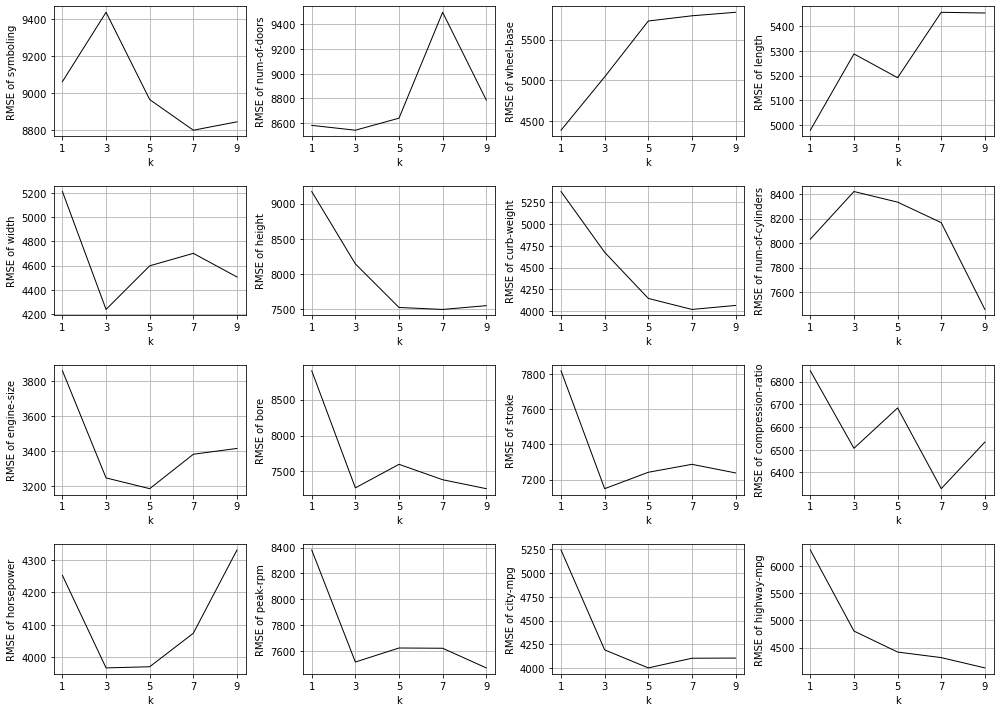

In [24]:
# Plot the RMSE values of unvariate model:
df_rmse = knn_train_test_v2(cars)

In [25]:
# RMSE results for each feature for k values = 1, 3, 5, 7, and 9:
df_rmse

,"RMSE, k=1","RMSE, k=3","RMSE, k=5","RMSE, k=7","RMSE, k=9"
symboling,9062.102025,9438.627799,8964.458098,8798.123705,8843.639010
num-of-doors,8581.387175,8542.092572,8639.692651,9498.785965,8786.892043
wheel-base,4392.578093,5044.049413,5726.279110,5789.803799,5832.599280
length,4979.760889,5287.155956,5191.234525,5454.788121,5451.960308
width,5211.463816,4238.757556,4598.651848,4701.492515,4506.388857
height,9173.214234,8142.564014,7521.914229,7493.719773,7547.550005
curb-weight,5371.391851,4674.951589,4146.304902,4019.934794,4065.879381
num-of-cylinders,8031.984993,8421.454514,8334.652419,8166.885866,7457.264403
engine-size,3858.586985,3244.618559,3183.019558,3380.308122,3413.553880
bore,8901.710901,7271.403406,7599.336157,7384.971065,7260.401605


In [26]:
# Display the mean values for each feature:
df_rmse.mean(axis=1).sort_values()

engine-size          3416.017421
horsepower           4119.044573
city-mpg             4330.092829
curb-weight          4455.692503
width                4651.350918
highway-mpg          4793.218228
length               5272.979960
wheel-base           5357.061939
compression-ratio    6579.995618
stroke               7346.949314
bore                 7683.564627
peak-rpm             7722.596554
height               7975.792451
num-of-cylinders     8082.448439
num-of-doors         8809.770081
symboling            9021.390127
dtype: float64

Let's select the first six features for our Multivariate Model.

### Multivariate Model

In [27]:
def knn_train_test_v3(best_features, df):
    """
    We use this function to train and test multivariate models using:
    01 - the best 2, 3, 4, 5 and 6 features, and
    02 - k value equals to 5.
    """
    
    # Split the dataset into a Training and Test set:
    # 'n_split': number of folds, default = 5.
    kf = KFold(shuffle=True, random_state=1)
    
    # Instantiate the Machine Learning Model:
    # 'n_neighbors': default = 5.
    model = KNeighborsRegressor()
    
    # Store the RMSE values:
    avg_rmse_list = []
    
    # Store the name of features:
    X_join_list = []
    
    n = len(best_features) + 1
    
    for f in range(2, n):
        
        # Feature columns:
        X = df[best_features[:f]] # 2-D array

        # Target column:
        y = df['price']

        # Use the 'cross_val_score()' function to perform k-fold cross-validation.
        # Fit the model on the training set, and make predictions on the test set:
        mse_values = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=kf)

        # Calculate the RMSE values:
        rmse_values = np.sqrt(np.abs(mse_values))

        # Calculate the mean of RMSE values:
        avg_rmse = np.mean(rmse_values)
        avg_rmse_list.append(avg_rmse)
        
        # Join the string name of features and store them:
        X_join = ', '.join(X)
        X_join_list.append(X_join)
        
    
    # Diplay the RMSE values along with the name of columns:
    df_ = pd.DataFrame(range(2, n), columns=['Number of best Features'])
    df_['Best Features'] = X_join_list
    df_['RMSE'] = avg_rmse_list
        
    return df_


In [28]:
# The best six featured from previous step:
nr_best_features = ['engine-size', 'horsepower', 'city-mpg', 'curb-weight', 'width', 'highway-mpg']

knn_train_test_v3(nr_best_features, cars)

,Number of best Features,Best Features,RMSE
0,2,"engine-size, horsepower",3134.127323
1,3,"engine-size, horsepower, city-mpg",3074.523248
2,4,"engine-size, horsepower, city-mpg, curb-weight",3876.716676
3,5,"engine-size, horsepower, city-mpg, curb-weight...",3877.268963
4,6,"engine-size, horsepower, city-mpg, curb-weight...",3889.385688


We can see that the top 3 multivariate k-Nearest Neighbors models which achieved the lower RMSE values (the lower, the better) are these containing two, three and four features. Let's do a Grid Search using these three models and varying the hyperparameter value (`k`) from `1` to `25`.

### Hyperparameter Tuning

In [29]:
def knn_train_test_v4(df):
    """
    We use this function to train and test the models using:
    01 - three set of features seperately: 2 features, 3 features and 4 features, and
    02 - hyperparameter values from 1 to 25.
    """
    
    # Split the dataset into a Training and Test set:
    # 'n_split': number of folds, default = 5.
    kf = KFold(shuffle=True, random_state=1)
    
    
    # The best four featured from previous step:
    best_features = ['engine-size', 'horsepower', 'city-mpg', 'curb-weight']
    
    # Store the RMSE values for each feature and k values:
    rmse_feature_k = []
    
    
    for f in range(2, 5):
        
        # Feature columns:
        X = df[best_features[:f]] # 2-D array
        print('{} best features: {}'.format(f, best_features[:f]))

        # Target column:
        y = df['price']
        
        # Store the RMSE values:
        avg_rmse_list = []
        
        ################################
        # Grid Search for each Feature #
        ###############################
        
        for k in range(1, 26):
            
            # Instantiate the Machine Learning Model:
            model = KNeighborsRegressor(n_neighbors=k)        

            # Use the 'cross_val_score()' function to perform k-fold cross-validation.
            # Fit the model on the training set, and make predictions on the test set:
            mse_values = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=kf)

            # Calculate the RMSE values:
            rmse_values = np.sqrt(np.abs(mse_values))

            # Calculate the mean of RMSE values:
            avg_rmse = np.mean(rmse_values)
            avg_rmse_list.append(avg_rmse)
        
        # Store the average values of RMSE:
        rmse_feature_k.append(avg_rmse_list)
        

    #------------ Plot ------------#
    
    xticks = [x for x in range(1, 26)]
    
    labels_ = ['2 best features', '3 best features', '4 best feature']

    for p in range(3):
        plt.plot(xticks, rmse_feature_k[p], label=labels_[p])
        
    plt.xticks(np.arange(1, 27, 2))
    plt.yticks(np.arange(2500, 5000, 200))
    plt.xlabel('k value')
    plt.ylabel('RMSE')
    plt.title('RMSE results of Multivariate k-NN models')
    plt.legend()
        
    # Draw grid lines:
    plt.grid(True)

    plt.show()
        
    #return rmse_feature_k


2 best features: ['engine-size', 'horsepower']
3 best features: ['engine-size', 'horsepower', 'city-mpg']
4 best features: ['engine-size', 'horsepower', 'city-mpg', 'curb-weight']


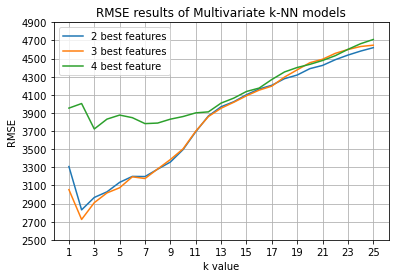

In [30]:
# Plot the RMSE results having different number of inputs and k values:
knn_train_test_v4(cars)

We can see that the 3-best-features model (orange line) outperforms the other two models from `k=1` to `k=5`. When the k values were larger than 11 (`k>11`), all three models achieved similar performance.